- Bert: Variation of transformer
we actually convert sentence into a vector
but in word2vec- we convert word into vector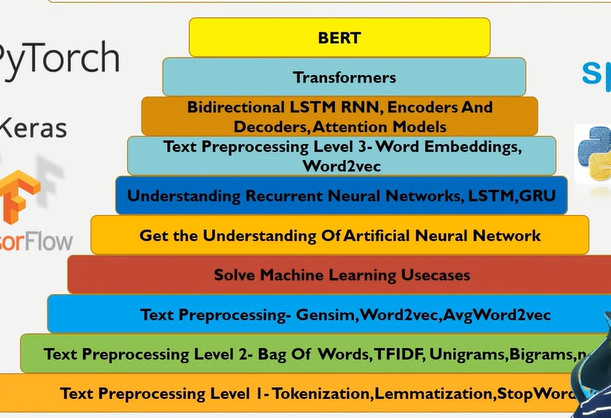

- Bert is a simplified version of a transformer

## **Tokenization**

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
paragraph = 'A well-organized paragraph supports or develops a single controlling idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs the order of the sentences; and it advises the reader of the subject to be discussed and how the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph. In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the current paragraph to the previous one, or one providing background information.'

sentences = nltk.sent_tokenize(paragraph)

#words
words = nltk.word_tokenize(paragraph)
len(words)

156

## **Stemming and Lemmatization**

<u>Stemming</u>
- history and historical converts into histor
- finally, final, finalizes - fina

- going, goes, gone - go
- dont take much time (just finds base word )

<U>Lemmatization</U> (meaningful one)
- history and histroical - history
- finally, final, finalizes - final
- takes some time

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#stopwords.words('english')

In [ ]:
# stemming

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''

sentences = nltk.sent_tokenize(paragraph)
stemmer = PorterStemmer()

# stemming
for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i]= ' '.join(words)

In [ ]:
sentences

['a well-organ paragraph support develop singl control idea , express sentenc call topic sentenc .',
 'a topic sentenc sever import function : substanti support essay ’ thesi statement ; unifi content paragraph direct order sentenc ; advis reader subject discuss paragraph discuss .',
 'reader gener look first sentenc paragraph determin subject perspect paragraph .',
 'that ’ ’ often best put topic sentenc begin paragraph .',
 'in case , howev , ’ effect place anoth sentenc topic sentence—for exampl , sentenc link current paragraph previou one , one provid background inform .']

problem - some words which are converted after stemming may not have the meaning
example : fina, intelligen etc

## Lemmetization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''

sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i] = " ".join(words)

In [ ]:
sentences

['A well-organized paragraph support develops single controlling idea , expressed sentence called topic sentence .',
 'A topic sentence several important function : substantiates support essay ’ thesis statement ; unifies content paragraph directs order sentence ; advises reader subject discussed paragraph discus .',
 'Readers generally look first sentence paragraph determine subject perspective paragraph .',
 'That ’ ’ often best put topic sentence beginning paragraph .',
 'In case , however , ’ effective place another sentence topic sentence—for example , sentence linking current paragraph previous one , one providing background information .']

## **Bag of Words**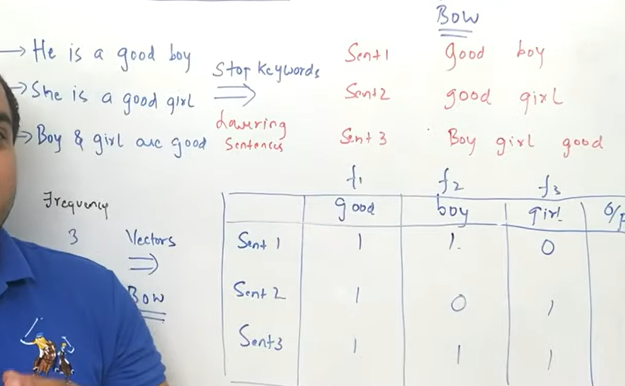

If there are more no. of words they word2vec is better option rather than using bag of words
- Because here in sent 1, good and boy gives the same meaning 1 ( weights)

## converting the prev para into bag of words

In [ ]:
import nltk

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''

In [ ]:
# cleaning of the texts
import re # for regular expression
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wn = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]',' ',sentences[i])
  review = review.lower()
  review = review.split()
  review = [wn.lemmatize(word) for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

# Creating the bad of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0]])

Problem  in BOW - No semantic meaning, for example the word bad and good may have the same weights

In [ ]:
import nltk

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wnl = WordNetLemmatizer()

sentences = nltk.sent_tokenize(paragraph)
corpus =[]
for i in range(len(sentences)):
  review = re.sub('[^a-zA-z]',' ',sentences[i])
  review = review.lower()
  review = review.split()
  words = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english') ]
  review = ' '.join(words)
  corpus.append(review)


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(corpus).toarray()
matrix


array([[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0]])

## **TF-IDF** - Term Frequency and Inverse Document frequency

- we multiply tf and idf to convert the sentences into vectors

- Term frequency = no. of repetition of words in sentence / no. of words in sentence

- IDF = log(no. of sentences/ no. of sentences containing the words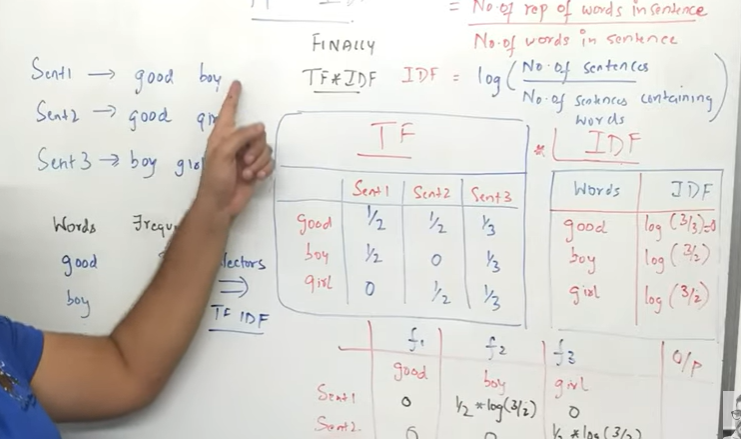)

In [ ]:
import nltk

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''

import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wnl = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-z]',' ',sentences[i])
  review = review.lower()
  review= review.split()
  review = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english')]
  review =  ' '.join(review)
  corpus.append(review)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()
X


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31460228, 0.        , 0.        , 0.31460228, 0.        ,
        0.        , 0.31460228, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31460228, 0.        ,
        0.        , 0.        , 0.        , 0.31460228, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31460228, 0.14990967, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29981935,
        0.        , 0.31460228, 0.        , 0.        , 0.        ,
        0.25381914, 0.        , 0.17724144, 0.        , 0.31460228],
       [0.23513726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23513726, 0.        , 0.        ,
        0.        , 0.        , 0.23513726, 0.23513726, 0.23513726,
        0.        , 0.23513726, 0.        , 0.        , 0.        ,
        0.23513726, 0.        , 0.        , 0. 

### Implementing a spam classifier

In [ ]:
import pandas as pd

df = pd.read_csv('/content/SMSSpamCollection.txt',sep='\t',
                 names=['label','message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['message'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
# Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
corpus = []
for i in range(len(df)):
  review = re.sub('[^a-zA-Z]',' ',df['message'][i])
  review = review.lower()
  review = review.split()
  review = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#corpus

In [ ]:
## Creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(df['label'],dtype=int)
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

y_pred = spam_detect_model.predict(X_test)

scores = accuracy_score(y_pred,y_test)
scores

0.9802690582959641

In [ ]:
import matplotlib.pyplot as plt

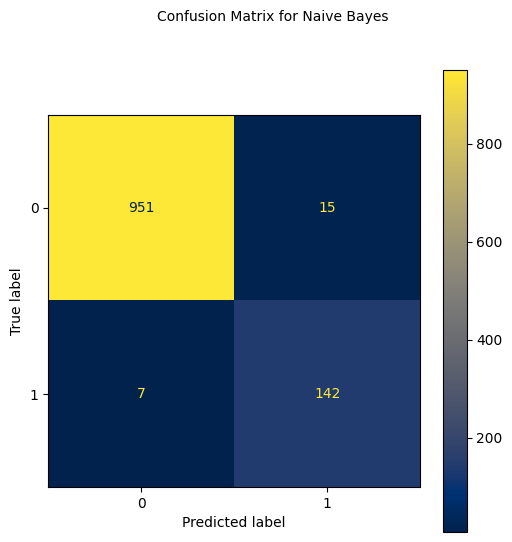

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 1, figsize=(6,6))

# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes, cmap=plt.cm.cividis, colorbar=True)


plt.suptitle('Confusion Matrix for Naive Bayes', fontsize = 10)
plt.show()

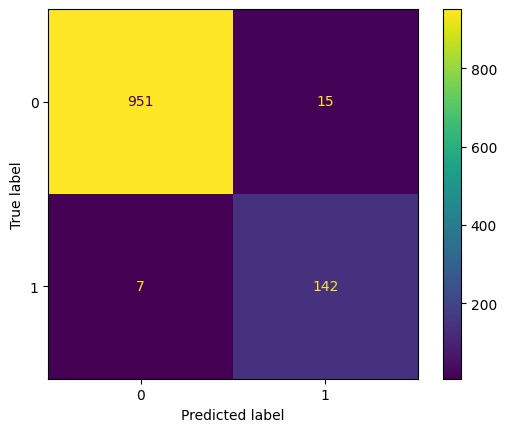

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## **World2Vec**

- Both BOW and TF-IDF approach semantic information information is not stored. TF-IDF gives importance to uncommon words

- There is chance of <u>overfitting </u>

### Solution
- In this specific model, each word is basically represented as a vector of 32 or more dimension instead of a single number
- Here the semantic information and relation between different words is also preserved.


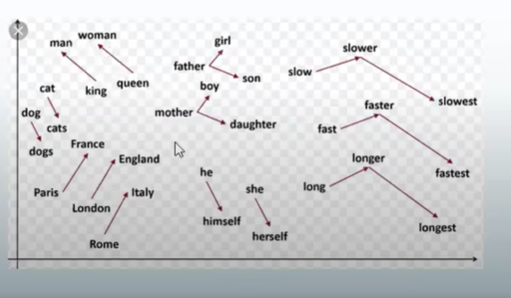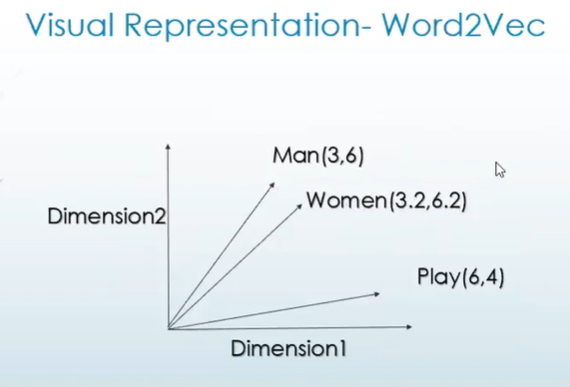

In [60]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords

import re

paragraph = '''A well-organized paragraph supports or develops a single controlling
idea, which is expressed in a sentence called the topic sentence. A topic sentence has several important functions: it
substantiates or supports an essay’s thesis statement; it unifies the content of a paragraph and directs
the order of the sentences; and it advises the reader of the subject to be discussed and how
the paragraph will discuss it. Readers generally look to the first few sentences in a paragraph to determine the subject
and perspective of the paragraph. That’s why it’s often best to put the topic sentence at the very beginning of the paragraph.
In some cases, however, it’s more effective to place another sentence before the topic sentence—for example, a sentence linking the
current paragraph to the previous one, or one providing background information.
'''



In [66]:
# preprocessing the data
text = re.sub('[^a-zA-z]',' ',paragraph)
text = text.lower()

sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
  sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

model = Word2Vec(sentences,min_count=1)

words = model.wv['topic']


array([ 9.62783379e-05,  3.07703111e-03, -6.81659114e-03, -1.37849315e-03,
        7.67154992e-03,  7.34416721e-03, -3.67179466e-03,  2.64600408e-03,
       -8.31699092e-03,  6.20733341e-03, -4.63673566e-03, -3.15992674e-03,
        9.31103714e-03,  8.76730599e-04,  7.49064749e-03, -6.07397640e-03,
        5.16073173e-03,  9.92337242e-03, -8.45462084e-03, -5.13577601e-03,
       -7.06503820e-03, -4.86626895e-03, -3.77632515e-03, -8.53441749e-03,
        7.95598701e-03, -4.84772399e-03,  8.42354260e-03,  5.26781566e-03,
       -6.55050250e-03,  3.95765016e-03,  5.47477184e-03, -7.42512103e-03,
       -7.40164658e-03, -2.47655693e-03, -8.62218253e-03, -1.58262090e-03,
       -4.02263569e-04,  3.30137648e-03,  1.43923890e-03, -8.79054365e-04,
       -5.59562864e-03,  1.73174310e-03, -8.99577630e-04,  6.79724710e-03,
        3.97124141e-03,  4.52787010e-03,  1.43398694e-03, -2.69545638e-03,
       -4.36729565e-03, -1.03522511e-03,  1.43864739e-03, -2.64652935e-03,
       -7.07296189e-03, -

In [72]:
similar = model.wv.most_similar('best')
similar

[('idea', 0.15661728382110596),
 ('one', 0.15434150397777557),
 ('current', 0.12401320785284042),
 ('beginning', 0.12275590002536774),
 ('statement', 0.11327642947435379),
 ('discuss', 0.09660174697637558),
 ('directs', 0.08751489967107773),
 ('providing', 0.08714889734983444),
 ('look', 0.08608578145503998),
 ('supports', 0.0780545324087143)]

## Stock sentiment analysis

class 1 = the stock price in increased
class 0 = decreased or same